<h1>Privacy-Preserving Data Publishing</h1>
<h2>Homework : Implementing the Laplace Mechanism</h2>
<h3>Florian Arnoud Thomas Lassalas Ismaël Tenaud </h3>
<br/>

In [1]:
import pandas
import matplotlib
import random
import numpy as np
import matplotlib.pyplot as plt

<h3>Implementing Laplace</h3>

In [2]:
#Creating the Laplace class
class Laplace:
    def __init__(self, epsilon, test=False):
        self.test = test
        self.epsilon = epsilon #total budget
        
    def set_test(b=True):
        self.test = b
        
    def gen_noise(self, sensitivity, fraction=1):
        
        #local epsilon, used for this draw
        local_epsilon = fraction*self.epsilon
        
        #if test mode is inactive, substract the local epsilon to the global epsilon (budget)
        if not self.test:
            if local_epsilon <= self.epsilon:
                self.epsilon -= local_epsilon
            else:
                print("Not enough budget")
                return
        
        #single value
        uniform_noise = np.random.uniform(-0.5, 0.5)
        
        #b -> second parameter of Laplace function
        b = sensitivity / local_epsilon
        
        #single value noise
        laplace_noise = -b * np.sign(uniform_noise) * np.log(1 - 2*abs(uniform_noise))
        
        return(laplace_noise)

<h3>Testing Laplace implementation</h3>

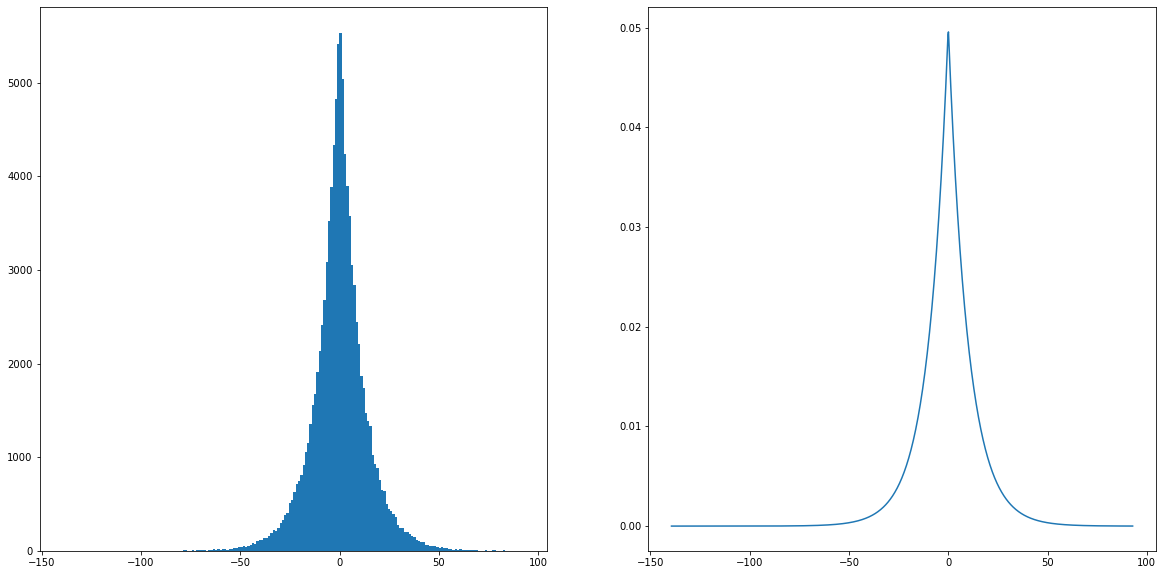

In [3]:
nb_perturbations = 100_000
epsilon = 0.1

laplace = Laplace(epsilon, test=True)
sensitivity = 1

perturbations = []

for i in range(nb_perturbations):
    perturbations.append(laplace.gen_noise(sensitivity, 1))


plt.rcParams["figure.figsize"] = (20,10)    

#histogram of random generated values of noise
plt.subplot(121)
plt.hist(perturbations, bins=200)

#laplace function parameters
a = 0
b = sensitivity/epsilon

#graph of therorical distribution
x = np.linspace(min(perturbations), max(perturbations), num=1000)
y = 1/(2*b) * np.exp(-(np.abs(x-a)/b))
plt.subplot(122)
plt.plot(x, y)

#l'idéal serait d'afficher les deux graphes l'un sur l'autre, mais ils sont pas à la même échelle, il faut trouver comment calculer le coefficient de scaling
plt.show()





<h3>Analyze Laplace</h3>
<h4>Why must we limit the number of aggregates published ?</h4>

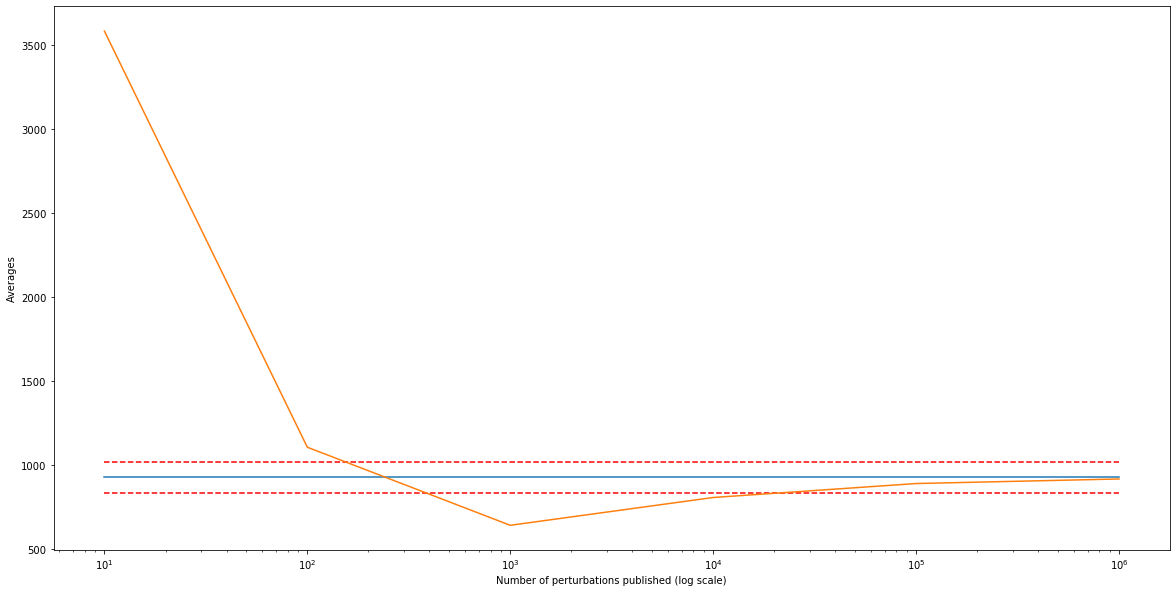

In [7]:
n = 1000
m = 200
epsilon = 1e-4

#generate random data
data = np.random.randint(0, m+1, n)

#count the number of integers greater than 10, r=COUNT()
r = len([elem for elem in data if elem>10])

l = Laplace(epsilon, test=True)

#axis for the future graph
X=[]
Y=[]

#log of number of perturbations
for i in range(1,7):
    nb_of_perturbations = 10**i
    X.append(nb_of_perturbations)
    
    perturbations = []
    for _ in range(nb_of_perturbations):
        #generate perturbations with sensitivity=1, because the query is a COUNT
        perturbations.append(l.gen_noise(1))
        
    perturbated_r = [r+elem for elem in perturbations]
    
    mean_p = np.mean(perturbated_r)
    Y.append(mean_p)

plt.xscale("log")
plt.xlabel("Number of perturbations published (log scale)")
plt.ylabel("Averages")
#ploting the true r value
plt.plot(X,[r]*len(X))
#ploting the 10% margin
plt.plot(X,[r*0.9]*len(X), "r--")
plt.plot(X,[r*1.1]*len(X), "r--")
#ploting the averages
plt.plot(X,Y)
plt.show()


<h4>How big is the error due to the perturbation ?</h4>

In [11]:
n = int(1e3)
epsilon = 1e-2
m = 1000

l = Laplace(epsilon, test=True)

perturbations = []
for _ in range(n):
    #sensitivity for a SUM aggregate -> max of the values -> m
    perturbations.append(l.gen_noise(m))
    
errors = np.abs(perturbations)

err_avg = np.mean(errors)


[1.21555005e+05 3.46216203e+02 1.96820876e+05 6.62369654e+03
 1.05548685e+05 8.10686697e+04 3.11281180e+05 3.20574506e+04
 1.53602222e+05 2.54115099e+04 4.04700733e+04 1.43913197e+05
 5.70029459e+04 3.60169711e+04 2.72754184e+04 1.81885337e+04
 2.48240067e+04 1.12821083e+05 1.49845978e+05 2.19144554e+05
 4.55076571e+03 8.64483301e+04 1.30155541e+04 1.62464729e+05
 1.51653248e+04 4.80848111e+04 2.62561704e+04 1.11755761e+05
 6.91705967e+04 2.05558483e+05 4.53095652e+04 3.04121343e+04
 1.93654114e+05 9.40575586e+04 7.69664818e+04 1.28670548e+04
 5.24128604e+04 3.49806695e+04 6.58839985e+04 7.13827723e+04
 1.51635853e+05 1.32168009e+04 7.04947178e+05 4.06463666e+04
 2.34327191e+04 7.58302881e+04 8.99083786e+04 6.54956895e+05
 1.41721760e+05 8.50659627e+04 1.43449434e+05 1.49906458e+05
 1.98508359e+04 8.68974971e+04 4.19435942e+04 7.78025928e+04
 2.20400222e+05 3.95679283e+04 1.37256036e+05 3.62364701e+04
 1.12767747e+05 5.37894521e+04 1.78930661e+04 7.81969487e+03
 8.28383436e+04 8.815037